In [ ]:
import json
import pandas as pd
from pathlib import Path

paths = [
    Path("../../../../analysis/mouse_m01_d2/results/simclr_neural_m01_d2.json"),
    Path("../../../../analysis/mouse_m02_d3/results/simclr_neural_m02_d3.json"),
    Path("../../../../analysis/mouse_m03_d4/results/simclr_neural_m03_d4.json")
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 135 rows from 3 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,simclr_neural,m01_d2,fc,NaN,0.024,0.161,1.702,1.711,0.211,NaN
1,simclr_neural,m01_d2,fc,10.0,0.022,0.135,1.702,1.711,0.205,0.092
2,simclr_neural,m01_d2,fc,20.0,0.022,0.143,1.702,1.711,0.210,0.092
3,simclr_neural,m01_d2,fc,50.0,0.024,0.157,1.702,1.711,0.213,0.102
4,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108
...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural,m03_d4,fc,200.0,0.016,0.091,1.703,1.714,0.154,0.107
96,simclr_neural,m03_d4,fc,300.0,0.016,0.091,1.703,1.714,0.154,0.105
97,simclr_neural,m03_d4,fc,400.0,0.016,0.091,1.703,1.714,0.154,0.110
98,simclr_neural,m03_d4,fc,500.0,0.016,0.091,1.703,1.714,0.154,0.084


In [2]:
# Filter to only rows where n_pcs == 100
df_100pcs = df[df["n_pcs"] == 100]
df_100pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,simclr_neural,m01_d2,fc,100.0,0.024,0.160,1.702,1.711,0.214,0.108
13,simclr_neural,m01_d2,layer1,100.0,0.022,0.114,3.891,4.271,0.225,-0.114
22,simclr_neural,m01_d2,layer2,100.0,0.043,0.178,3.487,3.872,0.233,-0.080
31,simclr_neural,m01_d2,layer3,100.0,0.046,0.172,1.911,1.917,0.245,-0.005
40,simclr_neural,m01_d2,layer4,100.0,0.029,0.132,1.887,1.894,0.193,0.085
49,simclr_neural,m02_d3,fc,100.0,0.017,0.113,1.704,1.712,0.156,0.108
58,simclr_neural,m02_d3,layer1,100.0,0.020,0.113,3.812,4.127,0.185,-0.114
67,simclr_neural,m02_d3,layer2,100.0,0.040,0.194,3.438,3.883,0.202,-0.080
76,simclr_neural,m02_d3,layer3,100.0,0.042,0.183,1.874,1.878,0.204,-0.005
85,simclr_neural,m02_d3,layer4,100.0,0.027,0.142,1.881,1.888,0.159,0.085


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_100pcs.groupby("layer").mean(numeric_only=True).reset_index()
avg_metrics

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,fc,100.0,0.019000,0.121000,1.703000,1.712333,0.174333,0.108
1,layer1,100.0,0.020333,0.109333,3.820000,4.203000,0.195000,-0.114
2,layer2,100.0,0.039000,0.178333,3.463333,3.928667,0.209333,-0.080
3,layer3,100.0,0.041000,0.168333,1.891333,1.896333,0.213333,-0.005
4,layer4,100.0,0.026000,0.128000,1.882333,1.889333,0.165333,0.085


In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalise each metric to [0, 1]
metrics = ['mean_fev', 'alpha', 'silhouette_score', 'spearman_correlation']
scaler = MinMaxScaler()
avg_metrics_scaled = avg_metrics.copy()
avg_metrics_scaled[metrics] = scaler.fit_transform(avg_metrics[metrics])
avg_metrics_scaled

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,fc,100.0,0.019000,0.169082,0.000000,1.712333,0.187500,1.000000
1,layer1,100.0,0.020333,0.000000,1.000000,4.203000,0.618056,0.000000
2,layer2,100.0,0.039000,1.000000,0.831523,3.928667,0.916667,0.153153
3,layer3,100.0,0.041000,0.855072,0.088962,1.896333,1.000000,0.490991
4,layer4,100.0,0.026000,0.270531,0.084711,1.889333,0.000000,0.896396


In [ ]:
# Rename mapping
metric_rename = {
    'alpha': 'Power-law α',
    'mean_fev': 'Mean FEV',
    'spearman_correlation': 'RSA',
    'silhouette_score': 'Semanticity'
}

# Prepare data for d3.js
avg_metrics_scaled = avg_metrics_scaled.astype(object).where(pd.notnull(avg_metrics_scaled), None)

# Metrics to include (original names from DataFrame)
metrics = ['alpha', 'mean_fev', 'spearman_correlation', 'silhouette_score']

# Construct radar data with renamed metrics
radar_data = []
layer_labels = []

for _, row in avg_metrics_scaled.iterrows():
    layer_labels.append(row["layer"])
    entry = [
        {"axis": metric_rename[metric], "value": row[metric]}
        for metric in metrics
    ]
    radar_data.append(entry)

# Save the radar data
with open(f"../../../d3_radar_plotting/{df.iloc[0]['model_target']}/data.json", "w") as f:
    json.dump(radar_data, f, indent=2)

# Save the labels separately
with open(f"../../../d3_radar_plotting/{df.iloc[0]['model_target']}/labels.json", "w") as f:
    json.dump(layer_labels, f, indent=2)

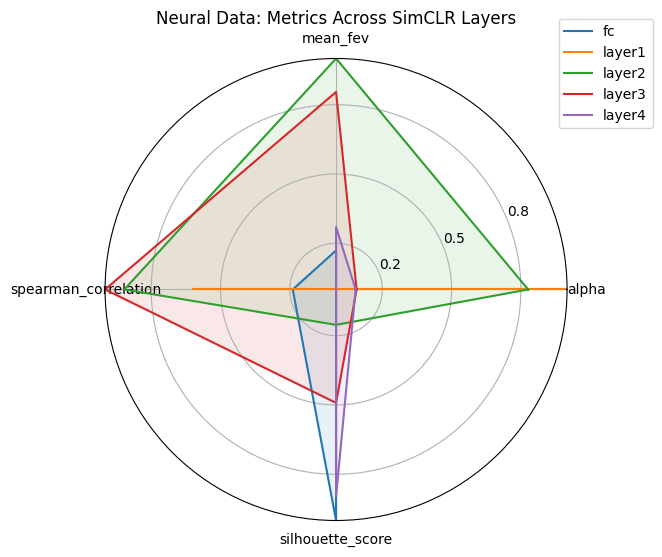

In [6]:
labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in avg_metrics_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Neural Data: Metrics Across SimCLR Layers")
plt.show()